In [3]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans

In [6]:
df=pd.read_csv('Copy of country(1).csv')

In [7]:
df

,Country,Lat,Long,Language
0,Austria,47.68,13.33,english
1,beljium,50.63,4.67,english
2,germany,51.15,10.43,german
3,norway,64.00,18.30,english
4,India,22.00,78.00,hindi
5,sreelanka,7.66,80.63,simhala
6,Australia,-10.45,113.09,english
7,southafrica,-30.00,25.00,english


In [11]:
km=KMeans(n_clusters=3)

In [12]:
km

KMeans(n_clusters=3)

In [15]:
predicted=km.fit_predict(df[['Lat','Long']])

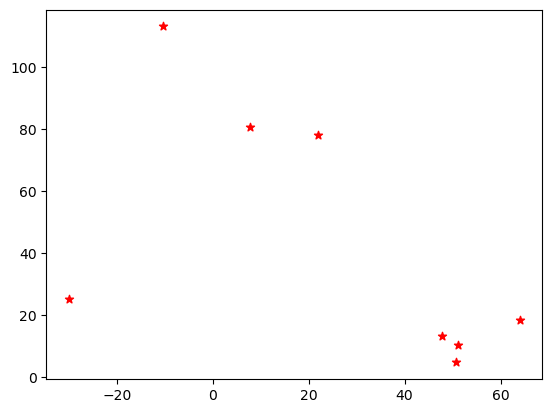

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['Lat'],df['Long'],marker="*",color='red')

In [17]:
predicted

array([0, 0, 0, 0, 1, 1, 1, 2])

In [18]:
df['clusters']=predicted
df

,Country,Lat,Long,Language,clusters
0,Austria,47.68,13.33,english,0
1,beljium,50.63,4.67,english,0
2,germany,51.15,10.43,german,0
3,norway,64.00,18.30,english,0
4,India,22.00,78.00,hindi,1
5,sreelanka,7.66,80.63,simhala,1
6,Australia,-10.45,113.09,english,1
7,southafrica,-30.00,25.00,english,2


In [20]:
df0=df[df['clusters']==0]
df1=df[df['clusters']==1]
df2=df[df['clusters']==2]

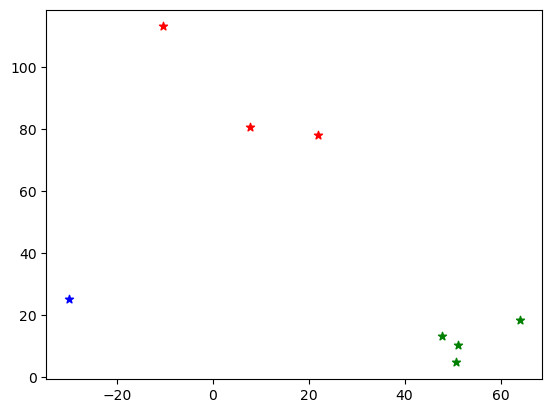

In [21]:
plt.scatter(df0['Lat'],df0['Long'],marker='*',color='green')
plt.scatter(df1['Lat'],df1['Long'],marker='*',color='red')
plt.scatter(df2['Lat'],df2['Long'],marker='*',color='blue')

In [22]:
km.cluster_centers_


array([[ 53.365     ,  11.6825    ],
       [  6.40333333,  90.57333333],
       [-30.        ,  25.        ]])

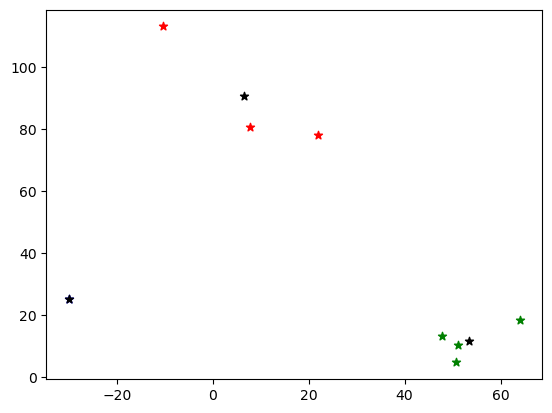

In [23]:
plt.scatter(df0['Lat'],df0['Long'],marker='*',color='green')
plt.scatter(df1['Lat'],df1['Long'],marker='*',color='red')
plt.scatter(df2['Lat'],df2['Long'],marker='*',color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='black')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
scaler.fit(df[['Lat']])
df['Lat']=scaler.transform(df[['Lat']])

In [31]:
scaler.fit(df[['Long']])
df['Long']=scaler.transform(df[['Long']])

In [32]:
df

,Country,Lat,Long,Language,clusters
0,Austria,0.826383,0.079875,english,0
1,beljium,0.857766,0.000000,english,0
2,germany,0.863298,0.053127,german,0
3,norway,1.000000,0.125715,english,0
4,India,0.553191,0.676351,hindi,1
5,sreelanka,0.400638,0.700609,simhala,1
6,Australia,0.207979,1.000000,english,1
7,southafrica,0.000000,0.187512,english,2


In [35]:
sse=[]
for i in range(1,6):
    km2=KMeans(n_clusters=i)
    km2.fit(df[['Lat','Long']])
    sse.append(km2.inertia_)
sse

C:\Users\harip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1.913778038791494,
 0.5378057846666695,
 0.15097757758048586,
 0.03806332208503518,
 0.01602913313799778]

In [37]:
km_new=KMeans(n_clusters=3)

In [40]:
km_new.fit_predict(df[['Lat','Long']])

array([1, 1, 1, 1, 0, 0, 0, 2])

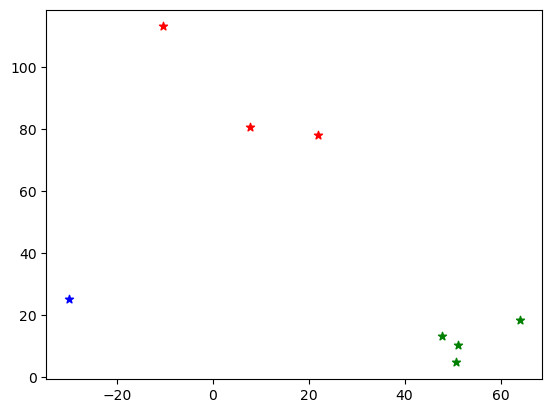

In [41]:
plt.scatter(df0['Lat'],df0['Long'],marker='*',color='green')
plt.scatter(df1['Lat'],df1['Long'],marker='*',color='red')
plt.scatter(df2['Lat'],df2['Long'],marker='*',color='blue')

In [42]:
km_new.inertia_

0.15097757758048586

In [43]:
df

,Country,Lat,Long,Language,clusters
0,Austria,0.826383,0.079875,english,0
1,beljium,0.857766,0.000000,english,0
2,germany,0.863298,0.053127,german,0
3,norway,1.000000,0.125715,english,0
4,India,0.553191,0.676351,hindi,1
5,sreelanka,0.400638,0.700609,simhala,1
6,Australia,0.207979,1.000000,english,1
7,southafrica,0.000000,0.187512,english,2
